Digital Signal Processing

Assignment #04

Group Members:

1. Navami Kairanda (Enrollment Number:2577665)
1. Pankhuri Vanjani (Enrollment Number:7009617)

**Steps in Kalman Filter implementation**

1. Initialization of states and variable that we want to estimate 

2. Building a model of the process. 

3. Predict or estimate state and covariance using the proces model. 

4. Next step is Updating  the state and residual covariance in the process by making use of prediction and measured values

5. Formulate an  optimal 'Kalman Gain'

6. Iterate through the updation steps to update the estimated state and covariance. 







In [15]:
# 2.1
import numpy as np
import matplotlib.pyplot as plt
import math
import pdb


In [16]:
def gen_next_measurement(px, py, vx, vy, ay, dt):
    px = px + vx * dt
    py = py + vy * dt + 0.5 * ay * (dt)**2
    vy = vy + ay * dt
    return px, py, vx, vy

In [17]:
# 2.2
def add_noise(px, py, vx, vy, mu, var):
    std = math.sqrt(var)
    px += np.random.normal(mu, std)
    py += np.random.normal(mu, std)
    vx += np.random.normal(mu, std)
    vy += np.random.normal(mu, std)
    return px, py, vx, vy 


In [18]:
# 2.3 and 2.4

def gen_next_gt(px, py, vx, vy, dt):
    px = px + vx * dt
    py = py + vy * dt 
    return px, py, vx, vy

def kalman_filter(var_eta, var_gamma):
    ay = -3.7
    dt = 0.01
    mean = 0
    N = 760

    px0, py0 = (0, 0)

    v = 20 
    alpha = 45
    vx0 = v * math.cos(math.pi * alpha / 180)
    vy0 = v * math.sin(math.pi * alpha / 180)

    (px, py, vx, vy) = (px0, py0, vx0, vy0)
    states_gt = [[px, py, vx, vy]]
    for i in range(N):
        px, py, vx, vy = gen_next_gt(px, py, vx, vy, dt)
        px, py, vx, vy = add_noise(px, py, vx, vy, mean, var_gamma)
        states_gt.append([px, py, vx, vy])
    states_gt = np.array(states_gt)

    (px, py, vx, vy) = (px0, py0, vx0, vy0)
    states_measurement = [[px, py, vx, vy]]
    for i in range(N):
        px, py, vx, vy = gen_next_measurement(px, py, vx, vy, ay, dt)
        px, py, vx, vy = add_noise(px, py, vx, vy, mean, var_eta)
        states_measurement.append([px, py, vx, vy])
    states_measurement = np.array(states_measurement)

    (px, py, vx, vy) = (px0, py0, vx0, vy0)
    states_optimal = [[px, py, vx, vy]]

    A = np.array([[1, dt, 0, 0], [0, 1, 0, 0], [0, 0, 1, dt], [0, 0, 0, 1]]) #dynamics
    C = np.eye(4) #measurement process

    gamma = np.identity(4) * var_gamma # purturbation covarriance 
    sigma = np.identity(4) * var_eta # noise covarriance 
    V = np.zeros((4, 4)) # meausrement uncertainty
    mu = np.array([px, py, vx, vy]) #initial position, velocity

    kalman_gain = []
    for i in range(N):
        P = np.matmul(A, np.matmul(V, A.T)) + gamma 
        #t = np.linalg.inv(np.matmul(np.matmul(C, P), C.T) + sigma)
        K = np.matmul(np.matmul(P, C.T), np.linalg.inv(np.matmul(np.matmul(C, P), C.T) + sigma)) 
        kalman_gain.append(np.diagonal(K))
        px, py, vx, vy = gen_next_measurement(px, py, vx, vy, ay, dt)
        x = np.array([px, py, vx, vy])
        #tt = x - np.matmul(C, np.matmul(A, mu))
        mu = np.matmul(A, mu) + np.matmul(K, x - np.matmul(C, np.matmul(A, mu)))
        states_optimal.append(mu)
        V = 1 - np.matmul(np.matmul(K, C), P)
    states_optimal = np.array(states_optimal)
    kalman_gain = np.array(kalman_gain)

    plt.figure(figsize=(16, 8))    
    
    plt_px = plt.subplot(2, 2, 1)
    plt_px.plot(states_gt[...,0], label = "Ground truth")
    plt_px.plot(states_measurement[...,0], label = "Measurement")
    plt_px.plot(states_optimal[...,0], label = "Optimal")
    plt.ylim([-100, 200])
    plt.ylabel("X Position (m)")
    plt.xlabel("time (sec)")
    plt.legend()
    plt.title("2-D Kalman Filter with eta = {} and sigma = {}".format(var_eta, var_gamma))

    plt_py = plt.subplot(2, 2, 2)
    plt_py.plot(states_gt[...,1], label = "Ground truth")
    plt_py.plot(states_measurement[...,1], label = "Measurement")
    plt_py.plot(states_optimal[...,1], label = "Optimal")
    plt.ylim([-100, 100])
    plt.ylabel("Y Position (m)")
    plt.xlabel("time (sec)")

    plt_vx = plt.subplot(2, 2, 3)
    plt_vx.plot(states_gt[...,2], label = "Ground truth")
    plt_vx.plot(states_measurement[...,2], label = "Measurement")
    plt_vx.plot(states_optimal[...,2], label = "Optimal")
    plt.ylim([-100, 100])
    plt.ylabel("X Velocity (m)")
    plt.xlabel("time (sec)")

    plt_vy = plt.subplot(2, 2, 4)
    plt_vy.plot(states_gt[...,3], label = "Ground truth")
    plt_vy.plot(states_measurement[...,3], label = "Measurement")
    plt_vy.plot(states_optimal[...,3], label = "Optimal")
    plt.ylim([-100, 100])
    plt.ylabel("Y Velocity (m)")
    plt.xlabel("time (sec)")

    plt.show()
    #plt.savefig('filter_{}_{}.jpg'.format(var_eta, var_gamma))
    return kalman_gain

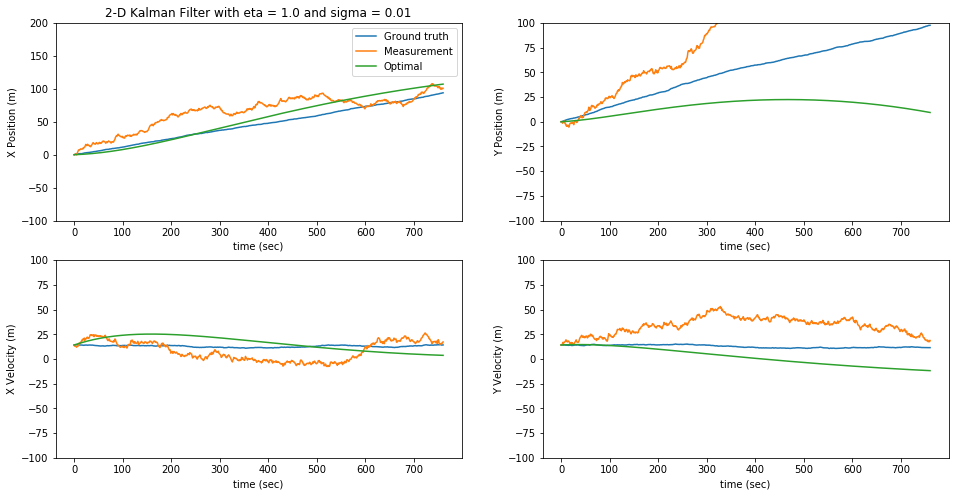

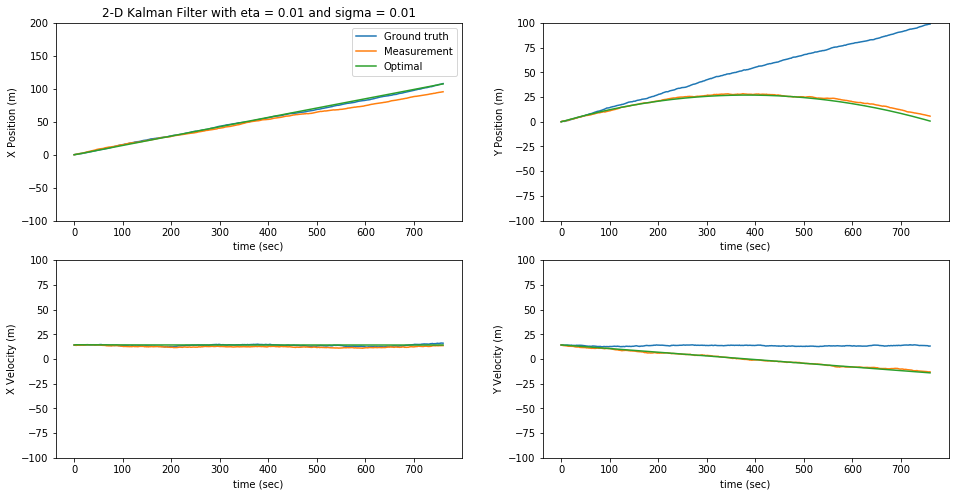

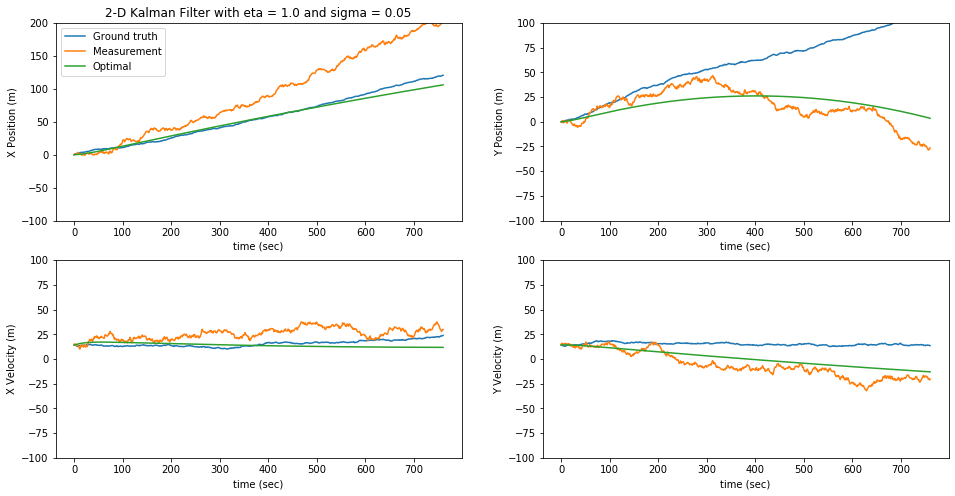

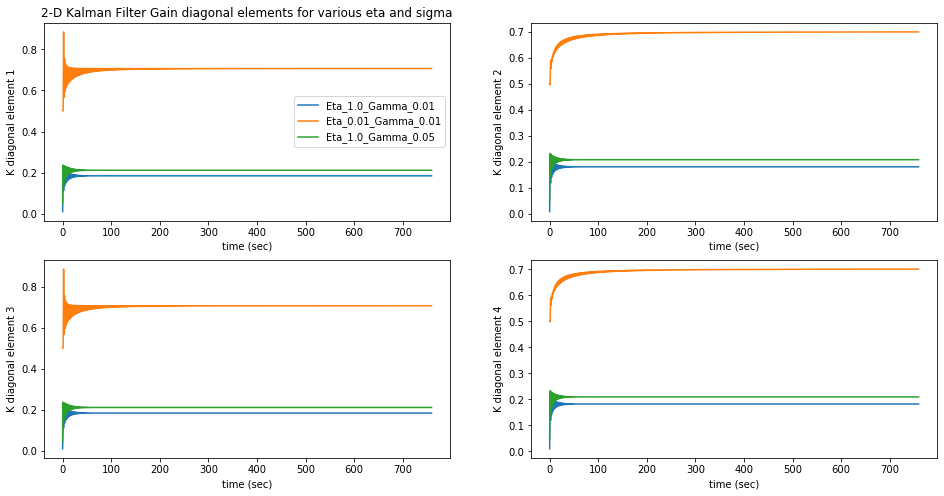

In [19]:
var_eta = [1., 0.01, 1.] #[0.01]  
var_gamma = [0.01, 0.01, 0.05] #[0.01]

kalman_gains = []
for i in range(len(var_eta)):
    kalman_gain = kalman_filter(var_eta[i], var_gamma[i])
    kalman_gains.append(kalman_gain)
kalman_gains = np.array(kalman_gains)

# 2.5
plt.figure(figsize=(16, 8))    
plt_d1 = plt.subplot(2, 2, 1)
plt_d1.plot(kalman_gains[0,...,0], label = "Eta_{}_Gamma_{}".format(var_eta[0], var_gamma[0]))
plt_d1.plot(kalman_gains[1,...,0], label = "Eta_{}_Gamma_{}".format(var_eta[1], var_gamma[1]))
plt_d1.plot(kalman_gains[2,...,0], label = "Eta_{}_Gamma_{}".format(var_eta[2], var_gamma[2]))
plt.ylabel("K diagonal element 1")
plt.xlabel("time (sec)")
plt.legend()
plt.title("2-D Kalman Filter Gain diagonal elements for various eta and sigma")

plt_d2 = plt.subplot(2, 2, 2)
plt_d2.plot(kalman_gains[0,...,1], label = "Eta_{}_Gamma_{}".format(var_eta[0], var_gamma[0]))
plt_d2.plot(kalman_gains[1,...,1], label = "Eta_{}_Gamma_{}".format(var_eta[1], var_gamma[1]))
plt_d2.plot(kalman_gains[2,...,1], label = "Eta_{}_Gamma_{}".format(var_eta[2], var_gamma[2]))
plt.ylabel("K diagonal element 2")
plt.xlabel("time (sec)")

plt_d3 = plt.subplot(2, 2, 3)
plt_d3.plot(kalman_gains[0,...,2], label = "Eta_{}_Gamma_{}".format(var_eta[0], var_gamma[0]))
plt_d3.plot(kalman_gains[1,...,2], label = "Eta_{}_Gamma_{}".format(var_eta[1], var_gamma[1]))
plt_d3.plot(kalman_gains[2,...,2], label = "Eta_{}_Gamma_{}".format(var_eta[2], var_gamma[2]))
plt.ylabel("K diagonal element 3")
plt.xlabel("time (sec)")

plt_d4 = plt.subplot(2, 2, 4)
plt_d4.plot(kalman_gains[0,...,3], label = "Eta_{}_Gamma_{}".format(var_eta[0], var_gamma[0]))
plt_d4.plot(kalman_gains[1,...,3], label = "Eta_{}_Gamma_{}".format(var_eta[1], var_gamma[1]))
plt_d4.plot(kalman_gains[2,...,3], label = "Eta_{}_Gamma_{}".format(var_eta[2], var_gamma[2]))
plt.ylabel("K diagonal element 4")
plt.xlabel("time (sec)")

plt.show()
#plt.savefig('kalman_gain_coeff.jpg')
